Reference:
https://www.statology.org/partial-least-squares-in-python/

In [2]:
import os

os.chdir('../')
os.getcwd()

'C:\\Users\\212295\\PycharmProjects\\stock-explorer'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [5]:
#define URL where data is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data_full = pd.read_csv(url)

#select subset of data
data = data_full[["mpg", "disp", "drat", "wt", "qsec", "hp"]]

#view first six rows of data
data.head()

,mpg,disp,drat,wt,qsec,hp
0,21.0,160.0,3.90,2.620,16.46,110
1,21.0,160.0,3.90,2.875,17.02,110
2,22.8,108.0,3.85,2.320,18.61,93
3,21.4,258.0,3.08,3.215,19.44,110
4,18.7,360.0,3.15,3.440,17.02,175


In [24]:
# define predictor and response variables
X = data[["mpg", "disp", "drat", "wt", "qsec"]]
y = data[["hp"]]

# define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

RepeatedKFold(n_repeats=3, n_splits=10, random_state=1)

Text(0.5, 1.0, 'hp')

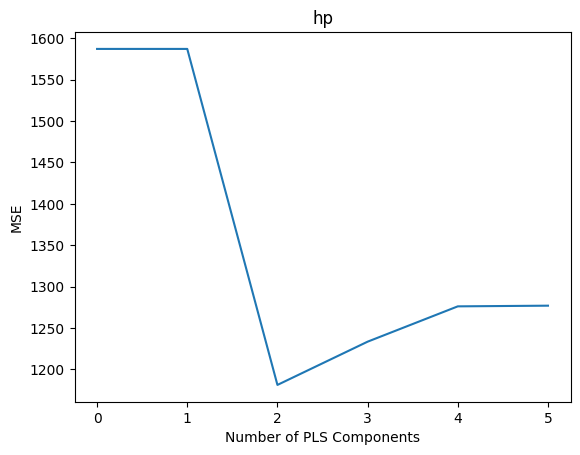

In [28]:
#define predictor and response variables
X = data[["mpg", "disp", "drat", "wt", "qsec"]]
y = data[["hp"]]

#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
# score = -1 * model_selection.cross_val_score(PLSRegression(n_components=1), np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()
score = -1 * model_selection.cross_val_score(PLSRegression(n_components=1), scale(X), y, cv=cv, scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1 * model_selection.cross_val_score(pls, scale(X), y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')